### The whole process of doing PRIM for the 800 samples LHS and saving the limits

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

###### Load data
with open('Data/X800.pickle', 'rb') as handle:
    X = pickle.load(handle)
with open('Data/output800.pickle', 'rb') as handle:
    output = pickle.load(handle)

In [2]:
X.shape

(800, 3)

## Exploratory analysis

In [3]:
X.shape

(800, 3)

Exploratory analysis

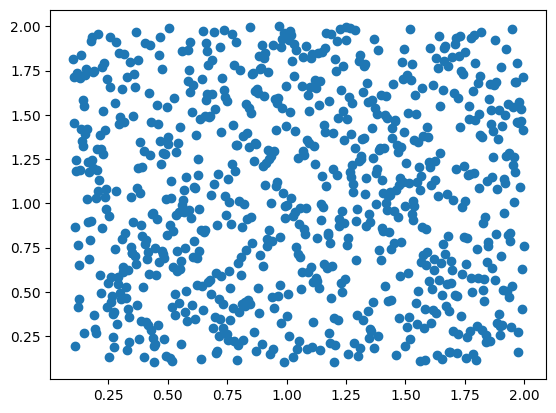

In [4]:
plt.scatter(X[:,0], X[:,1])

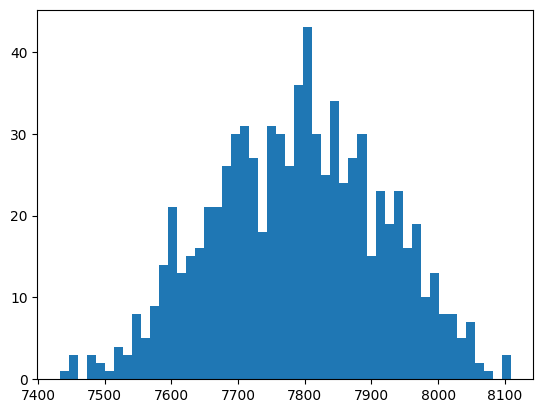

In [5]:
plt.hist(output, bins= 50)
plt.show()

In [6]:
print( "Maximum value:", output.max())
print( "Miminum value:", output.min())
percentil_20 = np.percentile(output, 20)
print( "Percentil 20:", percentil_20)

Maximum value: 8109
Miminum value: 7433
Percentil 20: 7676.8


### Transform the output to binary variable

In [7]:
Y= [1 if output[i] < percentil_20 else 0 for i in range(len(output))]
Y= np.array(Y).astype(float)
print("Number of vulnerable scenarios: ", sum(Y), " where the leasure trips are less than 7500 in the whole population")

Number of vulnerable scenarios:  160.0  where the leasure trips are less than 7500 in the whole population


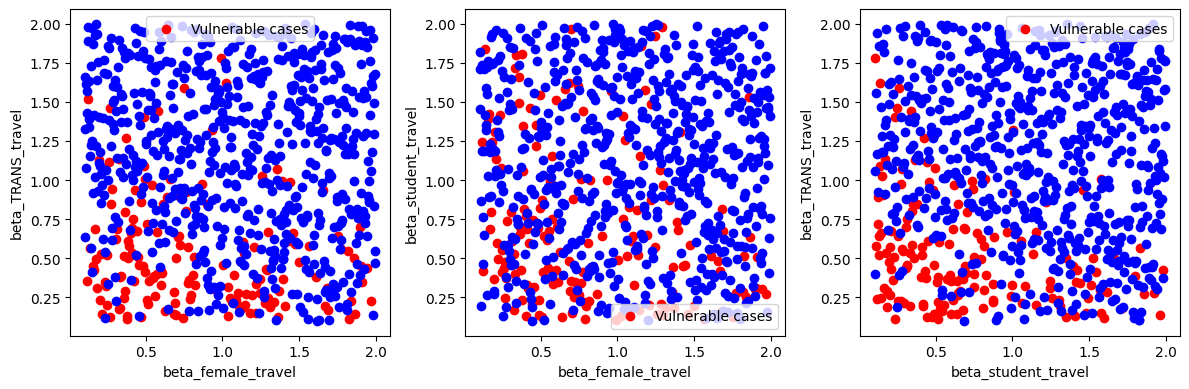

In [8]:
Y_mask= output < percentil_20
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].scatter(X[Y_mask,0], X[Y_mask,2], c='red', label= 'Vulnerable cases')
axes[0].scatter(X[~Y_mask,0], X[~Y_mask,2], c='blue')
axes[0].set_xlabel('beta_female_travel')
axes[0].set_ylabel('beta_TRANS_travel')
axes[0].legend()
axes[1].scatter(X[Y_mask,0], X[Y_mask,1], c='red', label= 'Vulnerable cases')
axes[1].scatter(X[~Y_mask,0], X[~Y_mask,1], c='blue')
axes[1].set_xlabel('beta_female_travel')
axes[1].set_ylabel('beta_student_travel')
axes[1].legend()
axes[2].scatter(X[Y_mask,1], X[Y_mask,2], c='red', label= 'Vulnerable cases')
axes[2].scatter(X[~Y_mask,1], X[~Y_mask,2], c='blue')
axes[2].set_xlabel('beta_student_travel')
axes[2].set_ylabel('beta_TRANS_travel')
axes[2].legend()

plt.tight_layout()

plt.show()

# PRIM

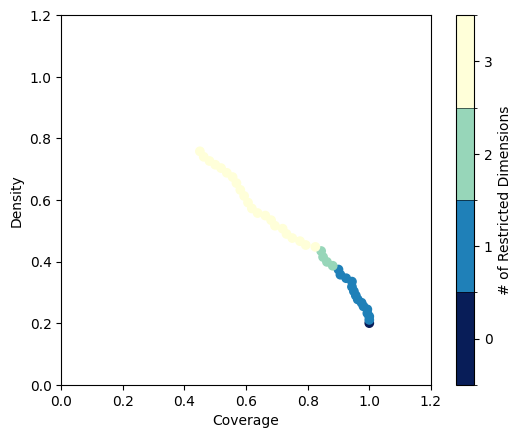

In [9]:
import prim
import pandas as pd
import matplotlib.pyplot as plt

p = prim.Prim(X, Y, threshold=0.3, threshold_type=">")

box = p.find_box()
box.show_tradeoff()

plt.show()

In [10]:
print(box)

Box 1 [Peeling Trajectory 40]
    Stats
        Coverage: 0.450000
        Density:  0.757895
        Mass:     0.118750
        Res Dim:  3.000000
        Mean:     0.757895
    Limits
                min       max     qp values
        2  0.101187  0.584500  3.347799e-20
        0  0.101187  1.249500  1.978376e-03
        1  0.101187  1.623563  2.121545e-02


In [11]:
box.peeling_trajectory

,coverage,density,mean,res dim,mass
0,1.00000,0.200000,0.200000,0,1.00000
1,1.00000,0.210526,0.210526,1,0.95000
2,1.00000,0.221607,0.221607,1,0.90250
3,0.99375,0.232117,0.232117,1,0.85625
4,0.99375,0.244615,0.244615,1,0.81250
5,0.98125,0.254457,0.254457,1,0.77125
6,0.97500,0.266212,0.266212,1,0.73250
7,0.96250,0.276978,0.276978,1,0.69500
8,0.95625,0.289773,0.289773,1,0.66000
9,0.95000,0.303393,0.303393,1,0.62625


In [12]:
limits = box.limits
limits

,min,max,qp values
2,0.101187,0.584500,3.347799e-20
0,0.101187,1.249500,1.978376e-03
1,0.101187,1.623563,2.121545e-02


In [13]:
with open('Data/Limits800.pickle', 'wb') as handle:
    pickle.dump(limits, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Estos son los detalles de la box elegida

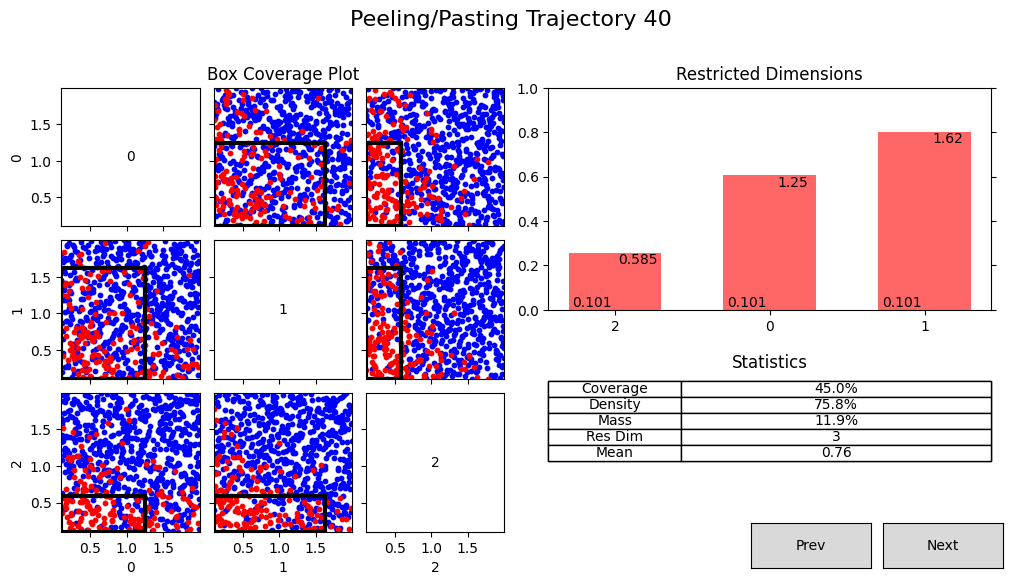

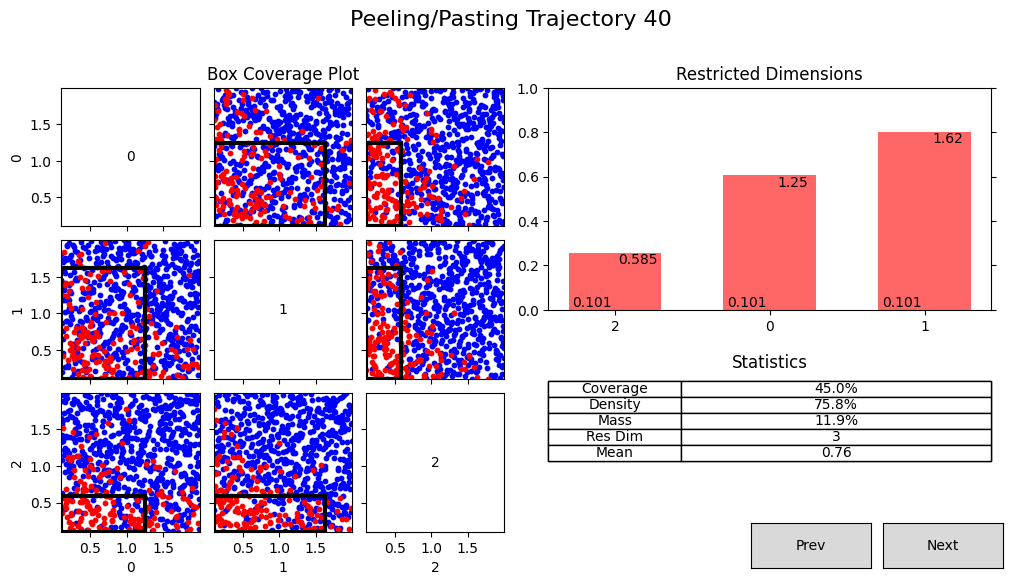

In [14]:
box.show_details()

In [39]:
box.select(20)
print(box)

Box 1 [Peeling Trajectory 20]
    Stats
        Coverage: 0.820513
        Density:  0.484848
        Mass:     0.330000
        Res Dim:  1.000000
        Mean:     0.484848
    Limits
               min    max     qp values
        2  0.10475  0.727  1.111205e-07
